In [1]:
import numpy as np
import pandas as pd

import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
census_data = pd.read_csv('/Users/bishmdl76/Desktop/Dataset_collection/census2015.csv')
census_data

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,...,0.9,3.3,2.3,22.5,1659,64.7,31.3,3.9,0.0,21.3
73997,72153750502,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,...,0.0,0.0,0.0,23.5,484,64.0,32.6,3.3,0.0,22.4
73998,72153750503,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,...,3.2,0.0,3.0,29.8,582,58.2,32.3,9.5,0.0,23.3
73999,72153750601,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,...,0.0,0.0,0.0,26.9,1369,67.5,31.2,1.3,0.0,26.7


In [3]:
A = ['Employed','Income','Men','Women','Citizen','IncomePerCap','Poverty','Professional','Service','Unemployment','Hispanic','White','Black','Asian','Native','Pacific']

In [4]:
X=census_data[A]
X

,Employed,Income,Men,Women,Citizen,IncomePerCap,Poverty,Professional,Service,Unemployment,Hispanic,White,Black,Asian,Native,Pacific
0,943,61838.0,940,1008,1503,25713.0,8.1,34.7,17.0,5.4,0.9,87.4,7.7,0.6,0.3,0.0
1,753,32303.0,1059,1097,1662,18021.0,25.5,22.3,24.7,13.3,0.8,40.4,53.3,2.3,0.0,0.0
2,1373,44922.0,1364,1604,2335,20689.0,12.7,31.4,24.9,6.2,0.0,74.5,18.6,1.4,0.5,0.3
3,1782,54329.0,2172,2251,3306,24125.0,2.1,27.0,20.8,10.8,10.5,82.8,3.7,0.0,1.6,0.0
4,5037,51965.0,4922,5841,7666,27526.0,11.4,49.6,14.2,4.2,0.7,68.5,24.8,3.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,1659,21188.0,3291,2914,4354,8474.0,40.7,32.9,19.2,21.3,99.7,0.3,0.0,0.0,0.0,0.0
73997,484,25781.0,921,1201,1466,10788.0,32.8,36.6,13.0,22.4,99.2,0.3,0.0,0.5,0.0,0.0
73998,582,17284.0,1097,1180,1741,8524.0,56.6,21.0,32.6,23.3,99.5,0.4,0.0,0.2,0.0,0.0
73999,1369,22083.0,2663,2604,3938,9907.0,39.9,36.7,18.6,26.7,98.8,1.2,0.0,0.0,0.0,0.0


In [5]:
X.corr()

,Employed,Income,Men,Women,Citizen,IncomePerCap,Poverty,Professional,Service,Unemployment,Hispanic,White,Black,Asian,Native,Pacific
Employed,1.000000,0.318049,0.894436,0.919080,0.879336,0.204324,-0.319605,0.230797,-0.214598,-0.301060,0.017832,0.074169,-0.178416,0.159457,-0.066248,0.014362
Income,0.318049,1.000000,0.176727,0.166638,0.204361,0.834342,-0.702208,0.731697,-0.586825,-0.483252,-0.227380,0.314051,-0.310067,0.281797,-0.071805,0.007893
Men,0.894436,0.176727,1.000000,0.929127,0.920412,0.023324,-0.153611,0.066223,-0.108743,-0.134165,0.115913,-0.018959,-0.131607,0.099412,-0.031199,0.026390
Women,0.919080,0.166638,0.929127,1.000000,0.919589,0.042430,-0.145014,0.083038,-0.103302,-0.114064,0.095830,-0.034156,-0.085767,0.099386,-0.040186,0.017188
Citizen,0.879336,0.204361,0.920412,0.919589,1.000000,0.114576,-0.236604,0.175612,-0.192873,-0.175364,-0.105089,0.167777,-0.131303,0.029224,-0.035695,0.002708
IncomePerCap,0.204324,0.834342,0.023324,0.042430,0.114576,1.000000,-0.606543,0.797913,-0.579995,-0.463069,-0.305389,0.379982,-0.283958,0.204656,-0.074839,-0.025618
Poverty,-0.319605,-0.702208,-0.153611,-0.145014,-0.236604,-0.606543,1.000000,-0.541328,0.583294,0.637417,0.344335,-0.522081,0.404917,-0.119229,0.085200,0.006999
Professional,0.230797,0.731697,0.066223,0.083038,0.175612,0.797913,-0.541328,1.000000,-0.650167,-0.451539,-0.332529,0.349109,-0.245997,0.264905,-0.043207,-0.034376
Service,-0.214598,-0.586825,-0.108743,-0.103302,-0.192873,-0.579995,0.583294,-0.650167,1.000000,0.467776,0.283783,-0.466326,0.371078,-0.078288,0.050832,0.053359
Unemployment,-0.301060,-0.483252,-0.134165,-0.114064,-0.175364,-0.463069,0.637417,-0.451539,0.467776,1.000000,0.221526,-0.484947,0.472147,-0.104318,0.093158,0.003430


In [6]:
X.cov()

,Employed,Income,Men,Women,Citizen,IncomePerCap,Poverty,Professional,Service,Unemployment,Hispanic,White,Black,Asian,Native,Pacific
Employed,1.152252e+06,9.623533e+06,1.029561e+06,1.081013e+06,1.392727e+06,3.259178e+06,-4465.879114,3667.278994,-1881.175818,-1898.557279,434.017022,2414.623638,-4119.593369,1487.792561,-315.479786,15.807044
Income,9.623533e+06,8.215866e+08,5.325789e+06,5.128119e+06,8.469326e+06,3.551884e+08,-261657.212866,312949.027198,-137165.003870,-80776.437822,-149446.493978,276103.389523,-193231.862217,71047.084919,-9176.254531,233.598420
Men,1.029561e+06,5.325789e+06,1.149896e+06,1.091713e+06,1.456293e+06,3.706481e+05,-2137.200597,1048.198315,-949.558262,-842.795760,2811.279052,-615.029113,-3027.967413,924.248569,-148.044950,28.942235
Women,1.081013e+06,5.128119e+06,1.091713e+06,1.200626e+06,1.486739e+06,6.886693e+05,-2061.703647,1342.460784,-921.353141,-731.881952,2373.908890,-1131.713528,-2015.505529,943.769506,-194.768511,19.253298
Citizen,1.392727e+06,8.469326e+06,1.456293e+06,1.486739e+06,2.177079e+06,2.501177e+06,-4528.869444,3823.890881,-2316.919723,-1515.478139,-3501.557245,7477.296021,-4150.339809,373.269570,-232.694739,4.079614
IncomePerCap,3.259178e+06,3.551884e+08,3.706481e+05,6.886693e+05,2.501177e+06,2.264143e+08,-120032.073554,179648.660133,-71819.755333,-41275.369918,-105361.203448,175379.976540,-92962.813143,27076.139847,-5055.415462,-400.007692
Poverty,-4.465879e+03,-2.616572e+05,-2.137201e+03,-2.061704e+03,-4.528869e+03,-1.200321e+05,174.148078,-107.025677,63.497732,50.029104,104.295042,-211.400171,116.214996,-13.835273,5.041991,0.095625
Professional,3.667279e+03,3.129490e+05,1.048198e+03,1.342461e+03,3.823891e+03,1.796487e+05,-107.025677,225.212296,-80.780516,-40.034196,-114.480083,160.698846,-80.268023,34.981800,-2.903193,-0.534704
Service,-1.881176e+03,-1.371650e+05,-9.495583e+02,-9.213531e+02,-2.316920e+03,-7.181976e+04,63.497732,-80.780516,68.544214,22.880370,53.898312,-118.421510,66.798584,-5.703409,1.884299,0.457886
Unemployment,-1.898557e+03,-8.077644e+04,-8.427958e+02,-7.318820e+02,-1.515478e+03,-4.127537e+04,50.029104,-40.034196,22.880370,35.467283,30.267200,-88.589971,61.139043,-5.466611,2.483963,0.021172


In [7]:
X.isnull().sum()

Employed           0
Income          1100
Men                0
Women              0
Citizen            0
IncomePerCap     740
Poverty          835
Professional     807
Service          807
Unemployment     802
Hispanic         690
White            690
Black            690
Asian            690
Native           690
Pacific          690
dtype: int64

In [8]:
#getting the index of all the null values in the dataset
Income_MV = X.Income[X.Income.isnull()].index.tolist()

IncomePerCap_MV = X.IncomePerCap[X.IncomePerCap.isnull()].index.tolist()

Poverty_MV=X.Poverty[X.Poverty.isnull()].index.tolist()

Service_MV = census_data.Service[census_data.Service.isnull()].index.tolist()

Professional_MV=X.Professional[X.Professional.isnull()].index.tolist()

Unemployment_MV = X.Unemployment[X.Unemployment.isnull()].index.tolist()

Hispanic_MV = X.Hispanic[X.Hispanic.isnull()].index.tolist()

White_MV = X.White[X.White.isnull()].index.tolist()

Black_MV = X.Black[X.Black.isnull()].index.tolist()

Asian_MV = X.Asian[X.Asian.isnull()].index.tolist()

Native_MV = X.Native[X.Native.isnull()].index.tolist()

Pacific_MV = X.Pacific[X.Pacific.isnull()].index.tolist()

In [9]:
All_MV=list(set().union(Income_MV,IncomePerCap_MV,Professional_MV,Service_MV,Poverty_MV,Unemployment_MV,Hispanic_MV,White_MV,Black_MV,Asian_MV,Native_MV,Pacific_MV))

In [10]:
X.drop(All_MV,axis=0,inplace=True)
X.isnull().sum()

/Users/bishmdl76/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Employed        0
Income          0
Men             0
Women           0
Citizen         0
IncomePerCap    0
Poverty         0
Professional    0
Service         0
Unemployment    0
Hispanic        0
White           0
Black           0
Asian           0
Native          0
Pacific         0
dtype: int64

In [11]:
X.reset_index(drop=True,inplace=True)
Y1=X.Employed
Y2=X.Income
X.drop(['Employed','Income'],axis='columns',inplace=True)

In [12]:
X_train = X[:50000]
X_test = X[50000:]
Y_Employed_train = Y1[:50000]
Y_Employed_test = Y1[50000:]
Y_Income_train = Y2[:50000]
Y_Income_test = Y2[50000:]

In [13]:
rfr_model1 = RandomForestRegressor(n_estimators=250,max_features=8)
rfr_model1.fit(X_train,Y_Employed_train)
rfr_model2 = RandomForestRegressor(n_estimators=250,max_features=8)
rfr_model2.fit(X_train,Y_Income_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
print('Accuracy Score for Train Data for Employed: ',rfr_model1.score(X_train,Y_Employed_train))
print('Accuracy Score for Test Data for Employed: ',rfr_model1.score(X_test,Y_Employed_test))
print('Accuracy Score for Train Data for Income: ',rfr_model2.score(X_train,Y_Income_train))
print('Accuracy Score for Test Data for Income: ',rfr_model2.score(X_test,Y_Income_test))

Accuracy Score for Train Data for Employed:  0.9910998352581971
Accuracy Score for Test Data for Employed:  0.9393135276222755
Accuracy Score for Train Data for Income:  0.9800286901826366
Accuracy Score for Test Data for Income:  0.858540383243805


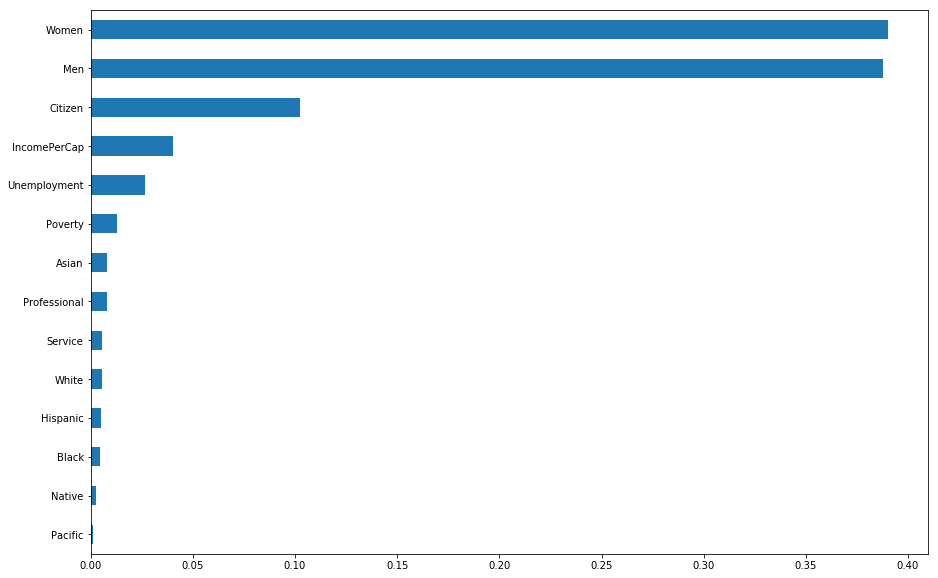

In [15]:
feature_importances_Employed = pd.Series(rfr_model1.feature_importances_,index=X.columns)
feature_importances_Employed.sort_values(ascending=True,inplace=True)
feature_importances_Employed.plot(kind='barh',figsize=(15,10))

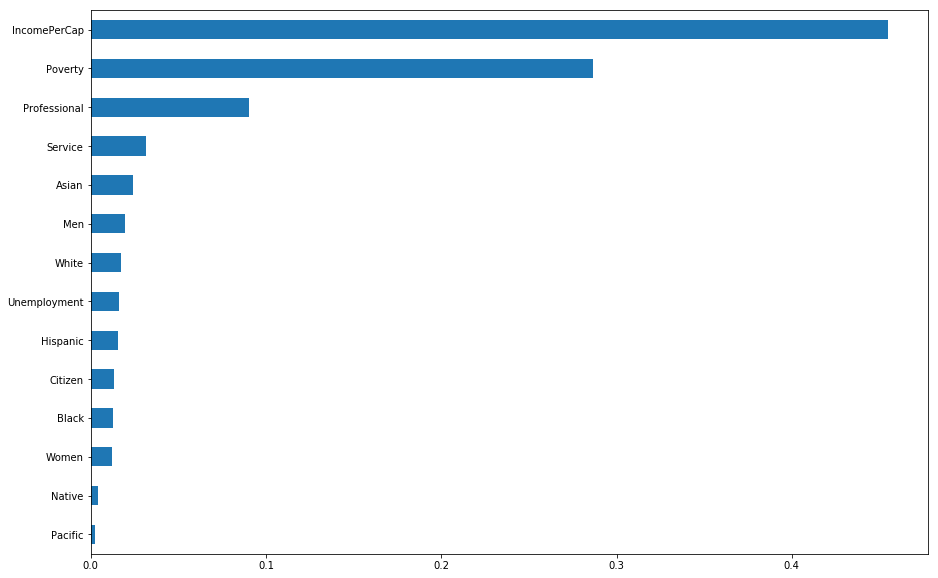

In [16]:
feature_importances_Income = pd.Series(rfr_model2.feature_importances_,index=X.columns)
feature_importances_Income.sort_values(ascending=True,inplace=True)
feature_importances_Income.plot(kind='barh',figsize=(15,10))

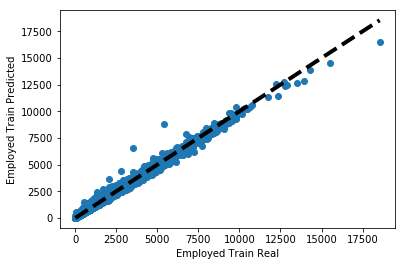

In [17]:
predicted_values=rfr_model1.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(Y_Employed_train, predicted_values)
ax.plot([Y_Employed_train.min(), Y_Employed_train.max()], [Y_Employed_train.min(), Y_Employed_train.max()], 'k--', lw=4)
ax.set_xlabel( 'Employed Train Real')
ax.set_ylabel('Employed Train Predicted')
plt.show()

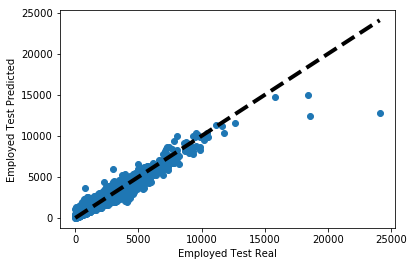

In [18]:
predicted_values=rfr_model1.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(Y_Employed_test, predicted_values)
ax.plot([Y_Employed_test.min(), Y_Employed_test.max()], [Y_Employed_test.min(), Y_Employed_test.max()], 'k--', lw=4)
ax.set_xlabel( 'Employed Test Real')
ax.set_ylabel('Employed Test Predicted')
plt.show()

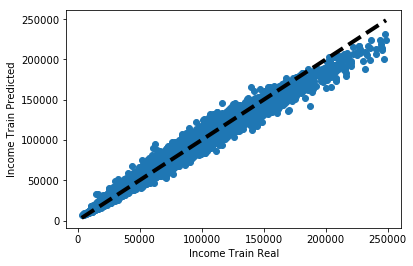

In [19]:
predicted_values=rfr_model2.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(Y_Income_train, predicted_values)
ax.plot([Y_Income_train.min(), Y_Income_train.max()], [Y_Income_train.min(), Y_Income_train.max()], 'k--', lw=4)
ax.set_xlabel( 'Income Train Real')
ax.set_ylabel('Income Train Predicted')
plt.show()

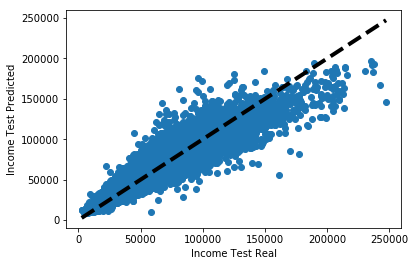

In [20]:
predicted_values=rfr_model2.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(Y_Income_test, predicted_values)
ax.plot([Y_Income_test.min(), Y_Income_test.max()], [Y_Income_test.min(), Y_Income_test.max()], 'k--', lw=4)
ax.set_xlabel( 'Income Test Real')
ax.set_ylabel('Income Test Predicted')
plt.show()